In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import mnist

In [13]:
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history_sgd = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 17s 34ms/step - loss: 1.3898 - accuracy: 0.5995 - val_loss: 0.3934 - val_accuracy: 0.8833
Epoch 2/5
469/469 [==============================] - 15s 32ms/step - loss: 0.3212 - accuracy: 0.9028 - val_loss: 0.2286 - val_accuracy: 0.9311
Epoch 3/5
469/469 [==============================] - 15s 32ms/step - loss: 0.2046 - accuracy: 0.9387 - val_loss: 0.1503 - val_accuracy: 0.9547
Epoch 4/5
469/469 [==============================] - 15s 32ms/step - loss: 0.1546 - accuracy: 0.9535 - val_loss: 0.1229 - val_accuracy: 0.9637
Epoch 5/5
469/469 [==============================] - 15s 32ms/step - loss: 0.1271 - accuracy: 0.9619 - val_loss: 0.0987 - val_accuracy: 0.9712


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history_adam = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 16s 34ms/step - loss: 0.0709 - accuracy: 0.9782 - val_loss: 0.0400 - val_accuracy: 0.9875
Epoch 2/5
469/469 [==============================] - 16s 34ms/step - loss: 0.0476 - accuracy: 0.9851 - val_loss: 0.0355 - val_accuracy: 0.9874
Epoch 3/5
469/469 [==============================] - 15s 33ms/step - loss: 0.0381 - accuracy: 0.9877 - val_loss: 0.0342 - val_accuracy: 0.9890
Epoch 4/5
469/469 [==============================] - 16s 34ms/step - loss: 0.0299 - accuracy: 0.9902 - val_loss: 0.0296 - val_accuracy: 0.9898
Epoch 5/5
469/469 [==============================] - 15s 33ms/step - loss: 0.0245 - accuracy: 0.9925 - val_loss: 0.0277 - val_accuracy: 0.9907


In [10]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history_rmsprop = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 18s 37ms/step - loss: 0.0268 - accuracy: 0.9906 - val_loss: 0.0285 - val_accuracy: 0.9909
Epoch 2/5
469/469 [==============================] - 15s 32ms/step - loss: 0.0216 - accuracy: 0.9932 - val_loss: 0.0360 - val_accuracy: 0.9887
Epoch 3/5
469/469 [==============================] - 16s 34ms/step - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.0245 - val_accuracy: 0.9925
Epoch 4/5
469/469 [==============================] - 16s 33ms/step - loss: 0.0136 - accuracy: 0.9957 - val_loss: 0.0338 - val_accuracy: 0.9916
Epoch 5/5
469/469 [==============================] - 16s 35ms/step - loss: 0.0114 - accuracy: 0.9962 - val_loss: 0.0280 - val_accuracy: 0.9930


In [12]:
sgd_training_acc = history_sgd.history['accuracy']
sgd_val_acc = history_sgd.history['val_accuracy']
sgd_loss =history_sgd.history['loss']

adam_training_acc = history_adam.history['accuracy']
adam_val_acc = history_adam.history['val_accuracy']
adam_loss =history_adam.history['loss']

rmsprop_training_acc = history_rmsprop.history['accuracy']
rmsprop_val_acc = history_rmsprop.history['val_accuracy']
rmsprop_loss =history_rmsprop.history['loss']

Text(0.5, 0, 'RMSProp Validation Accuracy')

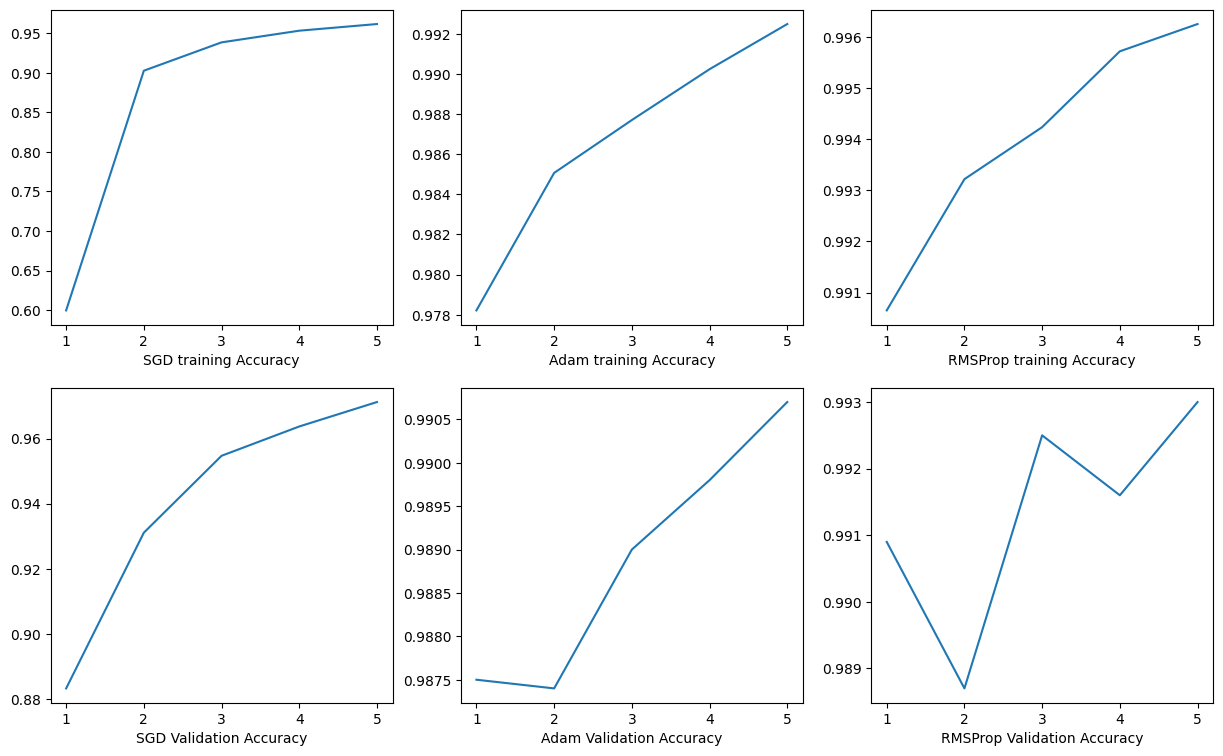

In [15]:
list = [1,2,3,4,5]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))

axes[0, 0].plot(list, sgd_training_acc, label='SGD training Accuracy')
axes[0, 0].set_xlabel('SGD training Accuracy')
axes[1, 0].plot(list, sgd_val_acc, label='SGD Validation Accuracy')
axes[1, 0].set_xlabel('SGD Validation Accuracy')


axes[0, 1].plot(list, adam_training_acc, label='Adam training Accuracy')
axes[0, 1].set_xlabel('Adam training Accuracy')
axes[1, 1].plot(list, adam_val_acc, label='SGD Validation Accuracy')
axes[1, 1].set_xlabel('Adam Validation Accuracy')


axes[0, 2].plot(list, rmsprop_training_acc, label='RMSProp training Accuracy')
axes[0, 2].set_xlabel('RMSProp training Accuracy')
axes[1, 2].plot(list, rmsprop_val_acc, label='RMSProp Validation Accuracy')
axes[1, 2].set_xlabel('RMSProp Validation Accuracy')

Text(0.5, 1.0, 'RmsProp LOSS')

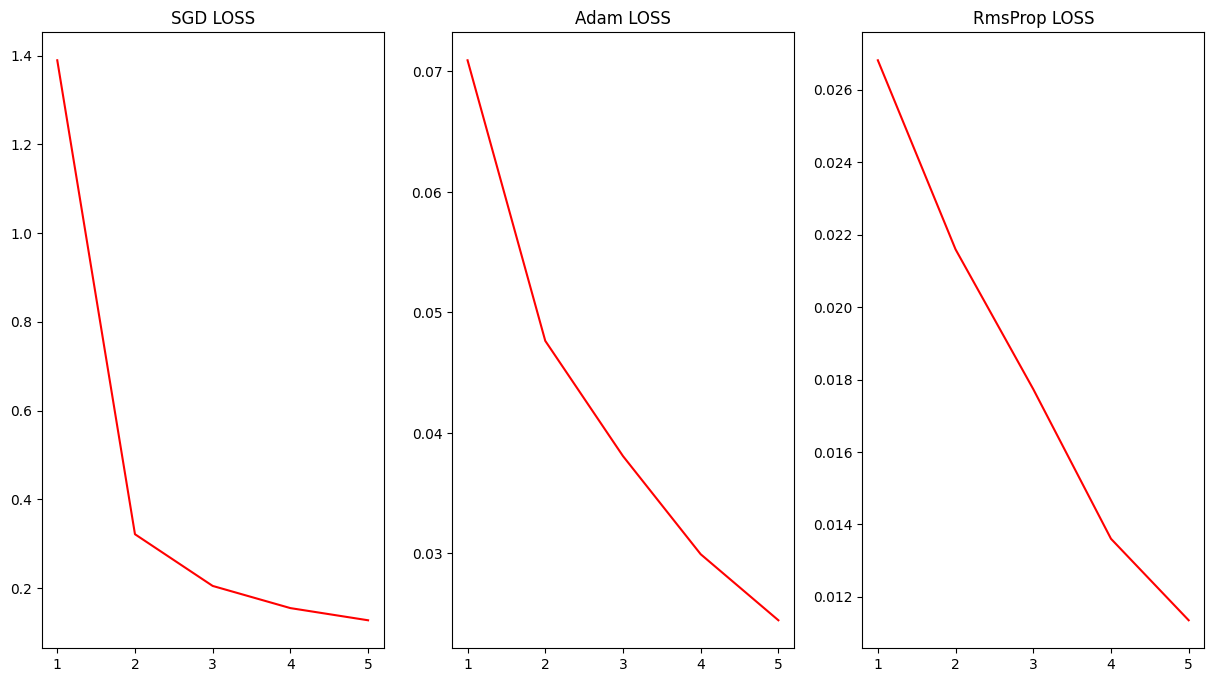

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 8))

ax1.plot(list, sgd_loss, color='r')
ax1.set_title('SGD LOSS')

ax2.plot(list, adam_loss, color='r')
ax2.set_title('Adam LOSS')

ax3.plot(list, rmsprop_loss, color='r')
ax3.set_title('RmsProp LOSS')